In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("../data/neo_task.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


<font size=4>
Датасет содержит следующие поля:

- `id` — идентификатор астероида
- `name` — название астероида
- `est_diameter_min` — минимальный расчётный диаметр астероидов (км)
- `est_diameter_max` — максимальный расчётный диаметр астероидов (км)
- `relative_velocity` — относительная скорость астероида по сравнению с Землёй
- `miss_distance` — расстояние от астероида до Земли (км)
- `absolute_magnitude` — абсолютная звездная величина астероида (показывает общую яркость астероида при стандартных условиях)
- `hazardous` — находится ли астероид в опасном диапазоне
</font>

<font size=4>
    Удалим поле id, так как оно несущественно для анализа
</font>

In [5]:
data = data.drop('id', axis=1)

<font size=4>
    Проверим, количество уникальных значений в столбце 'name'
</font>

In [6]:
data['name'].nunique()

27418

<font size=4>
    Так как количество уникальных значений велико (1/3 от всех значений), то удалим столбец 'name' как несущественный
</font>

In [7]:
data = data.drop('name', axis=1)

In [8]:
data.head(20)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
5,0.046191,0.103286,18933.875801,2.847083e+07,23.80,False
6,0.116026,0.259442,43184.402732,3.418417e+07,21.80,False
7,0.021113,0.047211,38064.802287,2.653154e+07,25.50,False
8,0.221083,0.494356,33736.859964,5.670662e+07,20.40,False
9,0.242412,0.542051,56188.215588,6.175441e+07,20.20,False


In [9]:
data.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


<font size=4>
    Определим, в каких столбцах имеются пропуски
</font>

In [10]:
data.isna().sum()

est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

<font size=4><b>Недостающее значение данных в следующих столбцах:</b>

- est_diameter_max
- relative_velocity
- absolute_magnitude</font>

<font size=4><b>Предположения для заполнения пропущенных значений:</b>

- Столбцы 'relative_velocity' и 'absolute_magnitude' заполним медианным значением по этим столбцам
- Столбец 'est_diameter_max' заполним медианой среди значений, которые превосходят значение 'est_diameter_min'</font>

In [11]:
data.fillna({'relative_velocity': data['relative_velocity'].median()}, inplace=True)
data.fillna({'absolute_magnitude': data['absolute_magnitude'].median()}, inplace=True)

In [12]:
data['est_diameter_max'] = data.apply(lambda x: data.loc[data['est_diameter_max'] > x['est_diameter_min'], 'est_diameter_max'].median()
                                if pd.isna(x['est_diameter_max']) else x['est_diameter_max'], axis=1)

In [13]:
data.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

<font size=4>
    После удаления пропусков исправим типы данных значений в столбцах.
</font>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


<font size = 4>
    Заменим в стобцах 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance' и'absolute_magnitude' значения с дробных на целочисленные. Для удобства работы переведём значения в столбцах 'est_diameter_min' и 'est_diameter_max' из километров в метры. Значения в столбце 'hazardous' также переведём в целочисленные.
</font>

In [15]:
data['est_diameter_min'] = data['est_diameter_min'].apply(lambda x: x * 1000)
data['est_diameter_max'] = data['est_diameter_max'].apply(lambda x: x * 1000)

In [16]:
data['relative_velocity'] = data['relative_velocity'].astype(int)
data['miss_distance'] = data['miss_distance'].astype(int)
data['absolute_magnitude'] = data['absolute_magnitude'].astype(int)
data['est_diameter_min'] = data['est_diameter_min'].astype(int)
data['est_diameter_max'] = data['est_diameter_max'].astype(int)
data['hazardous'] = data['hazardous'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   est_diameter_min    90836 non-null  int64
 1   est_diameter_max    90836 non-null  int64
 2   relative_velocity   90836 non-null  int64
 3   miss_distance       90836 non-null  int64
 4   absolute_magnitude  90836 non-null  int64
 5   hazardous           90836 non-null  int64
dtypes: int64(6)
memory usage: 4.2 MB


<font size=4>
    Проверим данные на наличие дубликатов и удалим их, если они имеются.
</font>

In [18]:
int(data.duplicated().sum())

283

In [19]:
data = data.drop_duplicates()
int(data.duplicated().sum())

0

<font size=4>
    Как можно заметить, дубликаты в данных отсутствуют.
</font>

<font size = 4>
    Проверим на наличие выбросов столбцы 'est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude'
</font>

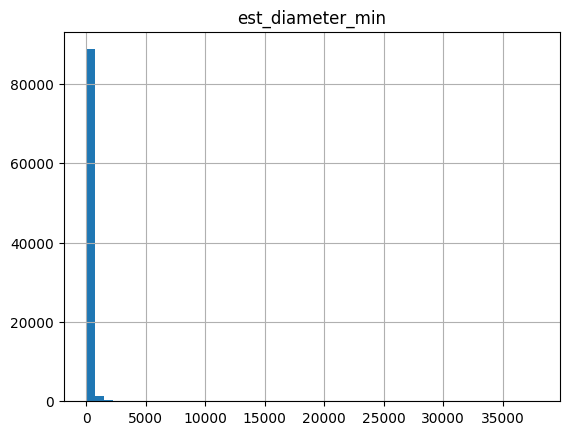

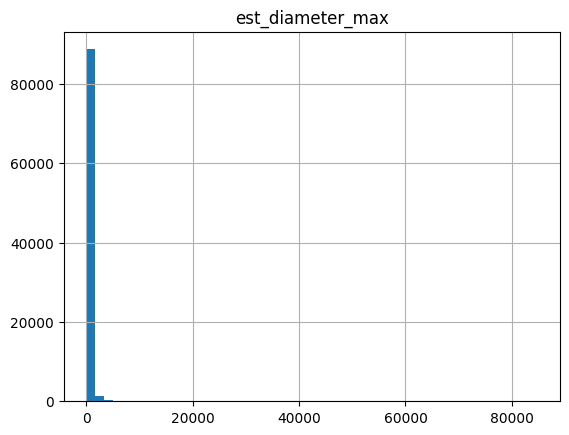

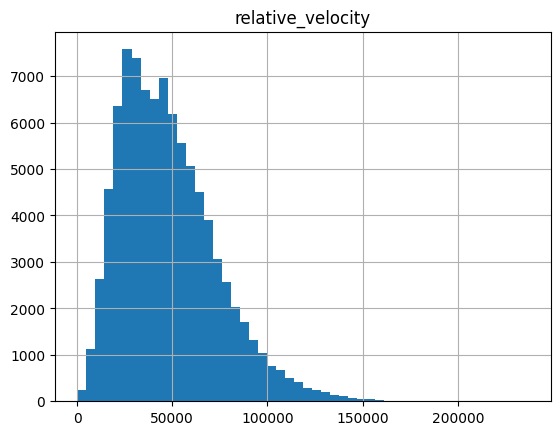

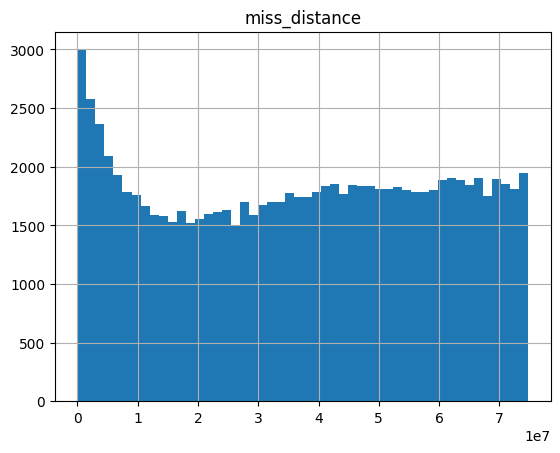

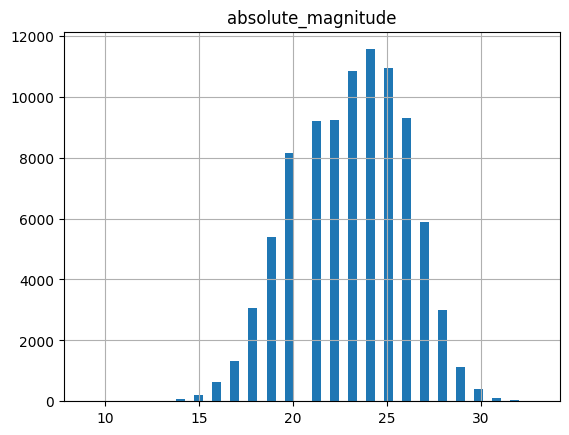

In [20]:
columns = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']

for column in columns:
    data.hist(column, bins=50)

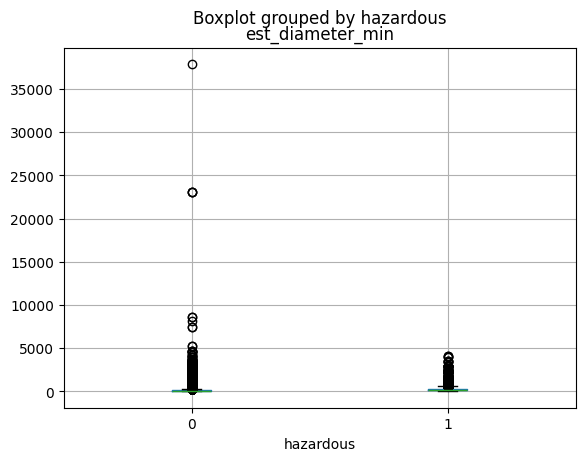

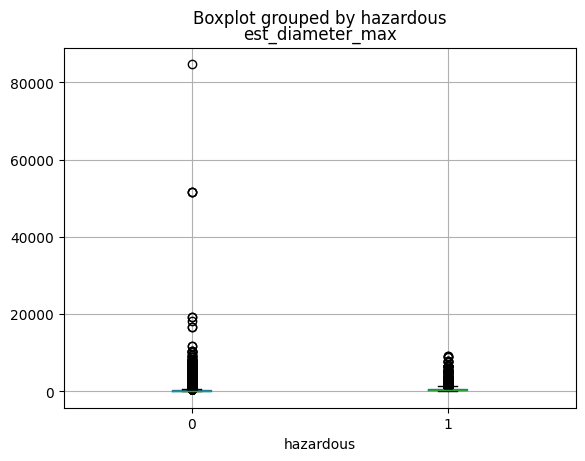

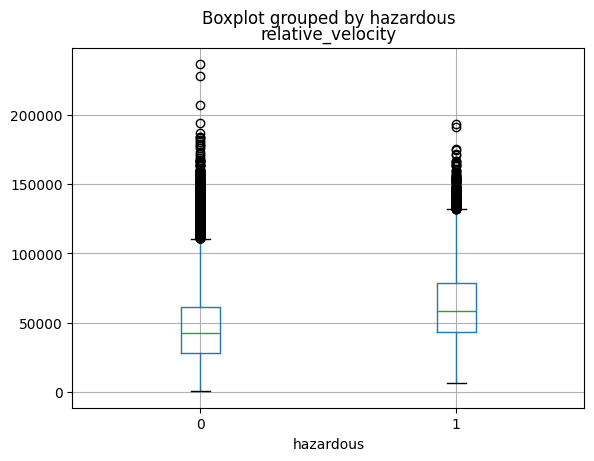

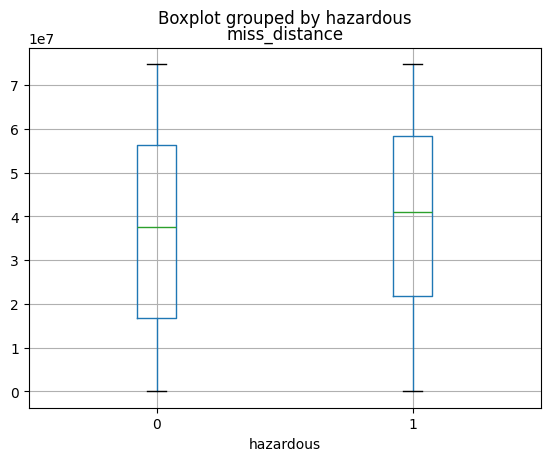

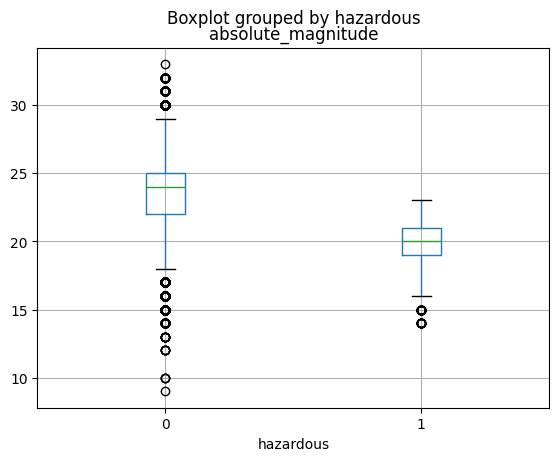

In [21]:
columns = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']

for column in columns:
    data.boxplot(by ='hazardous', column = column, grid = True)

<font size =4>
    В столбцах 'est_diameter_min', 'est_diameter_max' и 'relative_velocity' вероятно, присутствуют выбросы, так как на гистограмме виден большой скачок в данных, а диаграмма "ящик с усами" демонстрирует большое количество выбросов. Удалим выбросы, используя метод межквартильного размаха (IQR)
</font>

In [22]:
outlier = data[['est_diameter_min', 'est_diameter_max', 'relative_velocity']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)

In [23]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]

<font size=4>
    Посмотрим на гистограммы до и после удаления выбросов
</font>

array([[<Axes: title={'center': 'est_diameter_min'}>]], dtype=object)

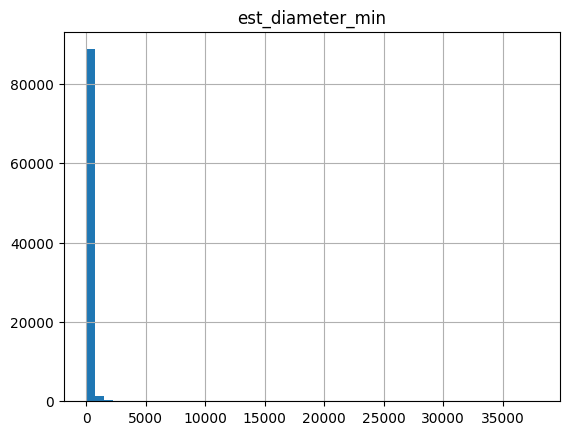

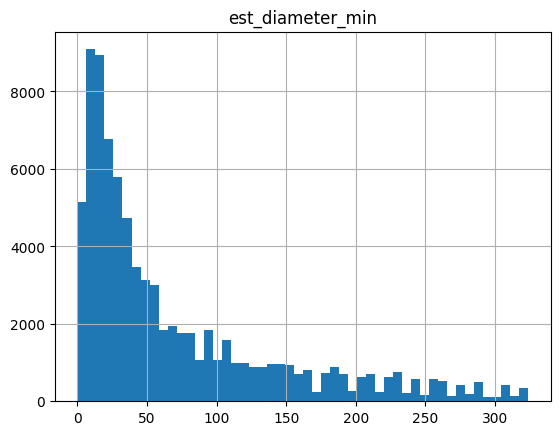

In [25]:
data.hist('est_diameter_min', bins=50)
data_filtered.hist('est_diameter_min', bins=50)

array([[<Axes: title={'center': 'est_diameter_max'}>]], dtype=object)

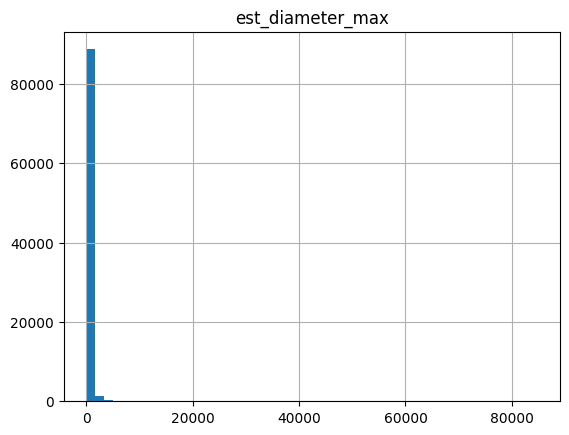

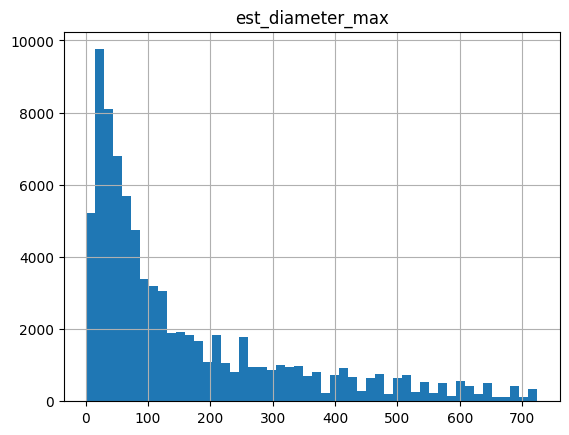

In [26]:
data.hist('est_diameter_max', bins=50)
data_filtered.hist('est_diameter_max', bins=50)

array([[<Axes: title={'center': 'relative_velocity'}>]], dtype=object)

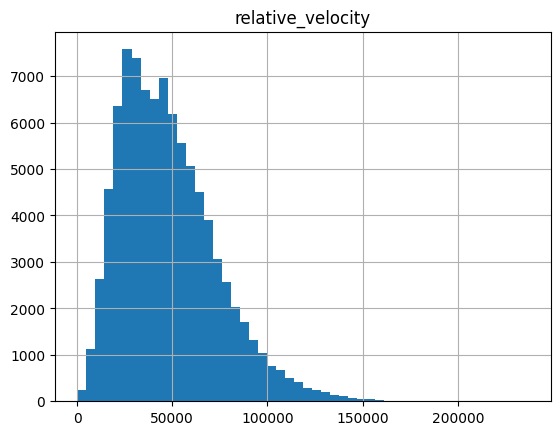

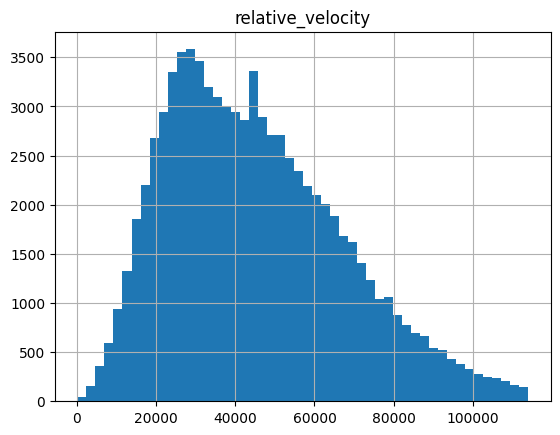

In [27]:
data.hist('relative_velocity', bins=50)
data_filtered.hist('relative_velocity', bins=50)

<font size = 4>
    После удаления выбросов максимальные значения переменных сократились более, чем в 100 раз, графики сильно скошены вправо, что свидетельствует о том, что говорит о том, что среднее значение больше медианы.
</font>

<font size = 4>
    Проанализируем зависимость опасности астероида от его минимального и максимального расчётных диаметров
</font>

<Axes: title={'center': 'est_diameter_max'}, xlabel='hazardous'>

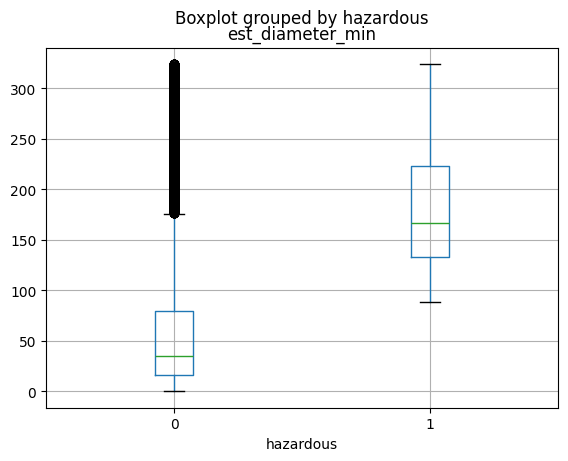

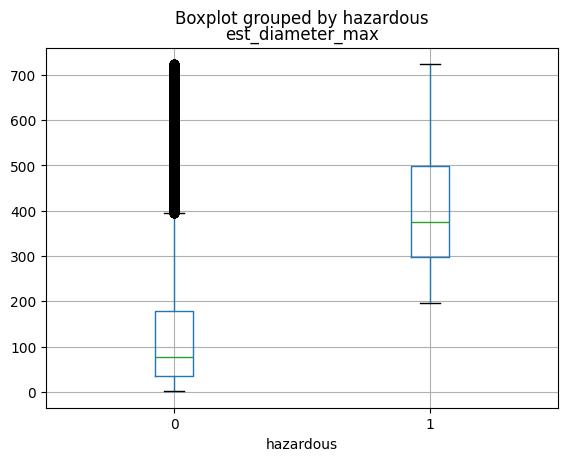

In [28]:
data_filtered.boxplot(by ='hazardous', column ='est_diameter_min', grid = True)
data_filtered.boxplot(by ='hazardous', column ='est_diameter_max', grid = True)

<font size = 4>
    По графикам видно, что опасные астероиды намного крупнее неопасных, различие в данных довольно большое, из чего можно сделать вывод, что расчётный диаметр астероида является одной из самых важных характеристик, по которым можно определить, опасен ли астероид
</font>

<font size=4>
    Проанализируем зависимость опасности астероида от скорости этого астероида относительно Земли
</font>

<Axes: title={'center': 'relative_velocity'}, xlabel='hazardous'>

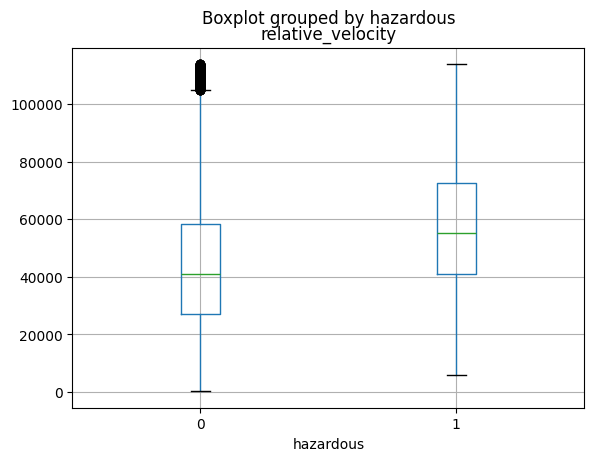

In [29]:
data_filtered.boxplot(by ='hazardous', column ='relative_velocity', grid = True)

<font size = 4>
    На графике видно, что у астероидов, которые считаются опасными, скорость выше, чем у остальных. Такой астероид быстрее пролетит атмосферу Земли и не успеет сгореть в ней.
</font>

<font size=4>
    Проанализируем зависимость опасности астероида от расстояния астероида до Земли
</font>

<Axes: title={'center': 'miss_distance'}, xlabel='hazardous'>

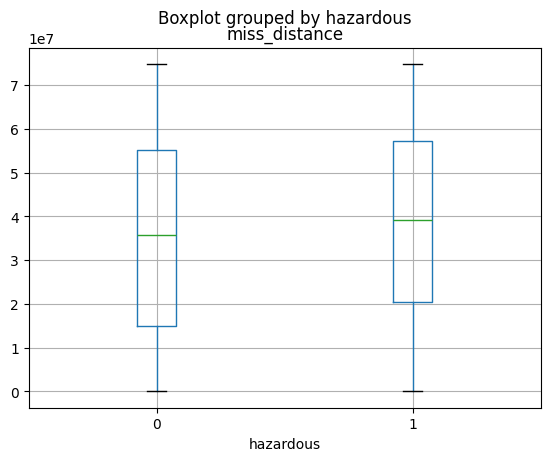

In [30]:
data_filtered.boxplot(by ='hazardous', column ='miss_distance', grid = True)

<font size=4>
    График показывает, что опасные астероиды чуть дальше от Земли, чем неопасные, но разница в расстояниях не очень большая, из чего можно сделать вывод, что расстояние от Земли играет незначительную роль в определении степени опасности астероида  
</font>

<font size = 4>
    Теперь исследуем опасность астероида от его абсолютной звездной величины
</font>

<Axes: title={'center': 'absolute_magnitude'}, xlabel='hazardous'>

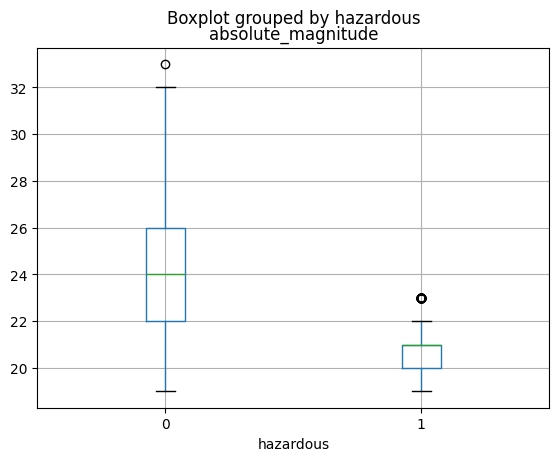

In [31]:
data_filtered.boxplot(by ='hazardous', column ='absolute_magnitude', grid = True)

<font size = 4>
    Заметим, что у опасных астероидов абсолютная величина меньше, чем у неопасных. Это говорит о том, что опасные астероиды ярче, и, следовательно, крупнее
</font>

<Axes: >

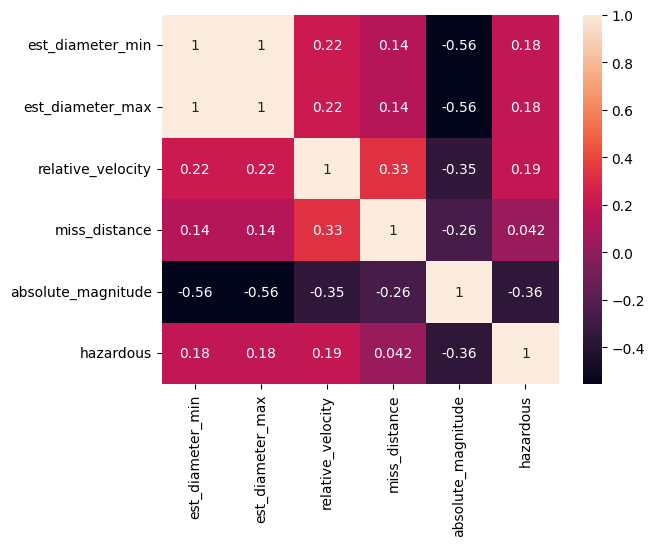

In [32]:
sns.heatmap(data.corr(), annot = True)

<font size = 5><b>Выводы</b><br></font>
<font size = 4>
    Для предлагаемого датасета были заполнены пропуски, удалены дубликаты, удалены столбцы, несущественные для анализа, исправлены типы данных в столбцах, исследовано влияние предикторов на целевой признак. 
</font>

In [33]:
data_filtered.to_csv("../data/asteroids_processed.csv", index=False)